In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
%matplotlib inline
from scipy import stats

# (1) Data Preprocessing

In [64]:
data = pd.read_csv("CreditScoring(After_Preprocessing).csv")
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
0,good,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846,94.562648,4.200000
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658,60.313631,4.980000
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985,67.001675,1.980000
3,good,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325,67.924528,7.933333
4,good,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910,34.065934,7.083871


In [65]:
## Dataset Dimensions
data.shape

(4446, 16)

### Questions to keep in mind:
#### (1) check maximum and minimum values
#### (2) check the scale of the variables (categorical, continuous, etc)
#### (3) look for outliers, weird values, missing values

In [66]:
# Checking if any Missing Values are there in the Dataset
# No Missing Values are there in the Dataset
data.isnull().any()

Status       False
Seniority    False
Home         False
Time         False
Age          False
Marital      False
Records      False
Job          False
Expenses     False
Income       False
Assets       False
Debt         False
Amount       False
Price        False
Finrat       False
Savings      False
dtype: bool

In [67]:
## checking if any categorical Features are there in the Dataset
categorical_data = data.select_dtypes(exclude=[np.number])
print ("There are {} categorical Columns in Dataset".format(categorical_data.shape[1]))

There are 5 categorical Columns in Dataset


In [68]:
# Name of all the Categorical Features Present in the Dataset
categorical_data.any()

Status     True
Home       True
Marital    True
Records    True
Job        True
dtype: bool

In [69]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
data['Status'] = model.fit_transform(data['Status'].astype('str'))
data['Home'] = model.fit_transform(data['Home'].astype('str'))
data['Marital'] = model.fit_transform(data['Marital'].astype('str'))
data['Job'] = model.fit_transform(data['Job'].astype('str'))
data['Records'] = model.fit_transform(data['Records'].astype('str'))

In [70]:
#Checking Data Types of the Features for Confirmation
data.dtypes

Status         int32
Seniority      int64
Home           int32
Time           int64
Age            int64
Marital        int32
Records        int32
Job            int32
Expenses       int64
Income         int64
Assets         int64
Debt           int64
Amount         int64
Price          int64
Finrat       float64
Savings      float64
dtype: object

## (2) Data Exploration

In [71]:
# Summary of the Data
data.describe()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
count,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,0.719073,7.991453,2.862348,46.453441,37.084121,1.503599,0.172964,0.610886,55.601439,140.629780,5354.948943,342.257085,1038.763383,1462.480432,72.616409,3.860083
std,0.449502,8.176370,1.308943,14.647979,10.986366,0.891838,0.378259,0.960975,19.520839,80.177896,11534.328183,1244.694549,474.747952,628.555171,20.390595,3.726292
min,0.000000,0.000000,0.000000,6.000000,18.000000,0.000000,0.000000,0.000000,35.000000,1.000000,0.000000,0.000000,100.000000,105.000000,6.702413,-8.160000
25%,0.000000,2.000000,2.000000,36.000000,28.000000,1.000000,0.000000,0.000000,35.000000,90.000000,0.000000,0.000000,700.000000,1116.250000,60.030020,1.615385
50%,1.000000,5.000000,2.000000,48.000000,36.000000,1.000000,0.000000,0.000000,51.000000,124.000000,3000.000000,0.000000,1000.000000,1400.000000,77.096757,3.120000
75%,1.000000,12.000000,4.000000,60.000000,45.000000,2.000000,0.000000,1.000000,72.000000,170.000000,6000.000000,0.000000,1300.000000,1691.500000,88.460263,5.195688
max,1.000000,48.000000,5.000000,72.000000,68.000000,4.000000,1.000000,3.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000,100.000000,33.250000


In [72]:
## Value Counts of 'GOOD' Status and 'BAD' Status
## 'GOOD': 3197 and 'BAD': 1249
data.Status.value_counts()

1    3197
0    1249
Name: Status, dtype: int64

In [73]:
# As per the Dataset there are approximately 72% GOOD Score and 28% BAD Score instances
status_count = data.Status.value_counts()/len(data)
status_count

1    0.719073
0    0.280927
Name: Status, dtype: float64

## PEARSON’S CORRELATION
#### Covariance is rarely used in summary statistics because it is hard to interpret. By itself, it does not provide a sense of how much the two variables vary together, but only their ‘direction’ (if you consider each series to be a vector). The unit of Covariance is also confusing because it is the product of two different units. Pearson’s Correlation divides the Covariance with the product of the standard deviations of both series resulting in a dimensionless value.

#### Pearson’s Correlation is bounded in [-1, 1].
#### If it is positive, the two variables tend to be high or low together
#### If it is negative, the two variables tend to be opposite of each other
#### If it is zero or close to zero they don’t affect each other
#### Sx, Sy are the standard deviations of the X, Y series respectively. Standard Deviation (σ) is a measure of the spread of the distribution.

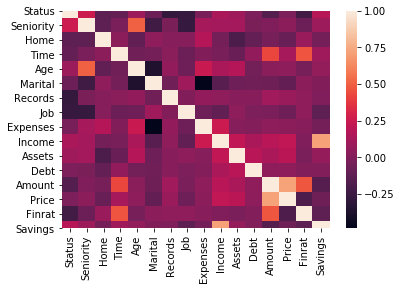

In [74]:
# Correlation between all the Features
# Correlation Plot
corr = data.corr()
sns.heatmap(corr)

#### As per the Correlation Matrix and the Correlation Values Calculated we can say that No Feature in the Dataset is highly Correlated with the Target Attribute 'Status'. Hence, there is no need for Feature Selection as of now and the Classification Model Such as 'Linear Regression ' and 'Logistic Regression' etc, can be performed directly on all the Features of the Dataset.

In [75]:
## Correlation Values of all the Features with respect to Target Variable 'Status' 
## Top 10 Values
print (corr['Status'].sort_values(ascending=False)[:10], '\n')

## Last 5 Values
print (corr['Status'].sort_values(ascending=False)[-5:])

Status       1.000000
Seniority    0.259742
Savings      0.185516
Income       0.144362
Assets       0.097239
Age          0.095305
Price       -0.010144
Debt        -0.010408
Expenses    -0.029633
Marital     -0.072958
Name: Status, dtype: float64 

Home      -0.123475
Amount    -0.154325
Finrat    -0.221790
Job       -0.267701
Records   -0.277817
Name: Status, dtype: float64


In [76]:
## Visualising Correlation Matrix with actual Correlation Values
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "15pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '15pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(3)\
    .set_table_styles(magnify())

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
Status,1,0.26,-0.123,-0.101,0.0953,-0.073,-0.278,-0.268,-0.0296,0.144,0.0972,-0.0104,-0.154,-0.0101,-0.222,0.186
Seniority,0.26,1,-0.121,-0.0219,0.506,-0.229,-0.0161,-0.271,0.126,0.121,0.124,-0.0193,-0.00764,0.0411,-0.0734,0.0932
Home,-0.123,-0.121,1,0.0415,-0.108,0.0519,0.0199,0.0155,0.176,-0.0393,-0.183,-0.0981,-0.0323,-0.087,0.0886,-0.0412
Time,-0.101,-0.0219,0.0415,1,-0.0518,-0.0393,0.0283,-0.0768,-0.00172,-0.0299,-0.083,0.0583,0.431,0.13,0.469,0.102
Age,0.0953,0.506,-0.108,-0.0518,1,-0.358,0.0598,-0.0614,0.248,0.148,0.181,-0.0462,0.029,0.0487,-0.0345,0.062
Marital,-0.073,-0.229,0.0519,-0.0393,-0.358,1,-0.0535,0.106,-0.484,-0.141,-0.0619,-0.0537,-0.0716,-0.102,0.0327,0.000178
Records,-0.278,-0.0161,0.0199,0.0283,0.0598,-0.0535,1,-0.000477,0.0583,0.0535,0.0215,0.0229,0.111,0.0848,0.0511,-0.00334
Job,-0.268,-0.271,0.0155,-0.0768,-0.0614,0.106,-0.000477,1,-0.0637,-0.111,0.0454,-0.0102,-0.0257,-0.0627,0.0517,-0.123
Expenses,-0.0296,0.126,0.176,-0.00172,0.248,-0.484,0.0583,-0.0637,1,0.255,0.0189,0.0148,0.0495,0.0407,0.0246,-0.0381
Income,0.144,0.121,-0.0393,-0.0299,0.148,-0.141,0.0535,-0.111,0.255,1,0.219,0.145,0.191,0.218,-0.00341,0.718


## Histogram Plots of all the Features in the Dataset

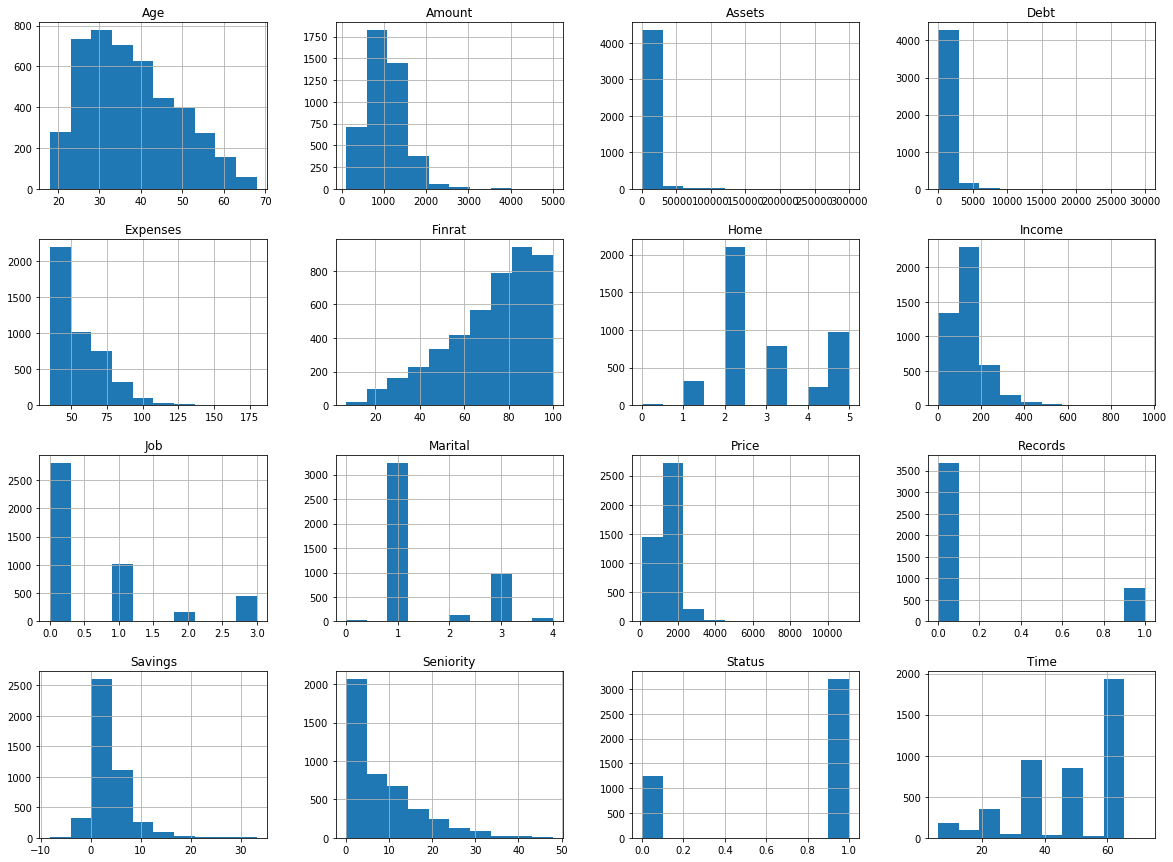

In [77]:
num_bins = 10

data.hist(bins = num_bins, figsize=(20,15))
plt.savefig("Data_Histogram_Plots")
plt.show()

## Scatterplots

columns = ['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records', 'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price', 'Finrat', 'Savings']
data.plot.scatter(x=columns[0], y=columns[14])
data.plot.hexbin(x=columns[0], y=columns[14], gridsize=10)
data.plot.scatter(x=columns[0], y=columns[15])
data.plot.hexbin(x=columns[0], y=columns[15], gridsize=25)
plt.show()

## Creating Dummy Variables

##### Dummy variables are "proxy" variables or numeric stand-ins for qualitative facts in a regression model. In regression analysis, the dependent variables may be influenced not only by quantitative variables (income, output, prices, etc.), but also by qualitative variables (gender, religion, geographic region, etc.). A dummy independent variable (also called a dummy explanatory variable) which for some observation has a value of 0 will cause that variable's coefficient to have no role in influencing the dependent variable, while when the dummy takes on a value 1 its coefficient acts to alter the intercept. For example, suppose membership in a group is one of the qualitative variables relevant to a regression. If group membership is arbitrarily assigned the value of 1, then all others would get the value 0.

In [78]:
list( data.columns )

['Status',
 'Seniority',
 'Home',
 'Time',
 'Age',
 'Marital',
 'Records',
 'Job',
 'Expenses',
 'Income',
 'Assets',
 'Debt',
 'Amount',
 'Price',
 'Finrat',
 'Savings']

In [79]:
X = list( data.columns )
X.remove( 'Status' )
X

['Seniority',
 'Home',
 'Time',
 'Age',
 'Marital',
 'Records',
 'Job',
 'Expenses',
 'Income',
 'Assets',
 'Debt',
 'Amount',
 'Price',
 'Finrat',
 'Savings']

In [80]:
Y = data['Status']

In [81]:
credit_data = pd.get_dummies( data[X], drop_first = True )
len( credit_data.columns )

15

In [82]:
### Splitting Dataset into 'Training' and 'Testing' Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data[X], Y, test_size = 0.3, random_state = 42 )

## (3) Logistic Regression Model

In [83]:
## Using 'statsmodel.api' you can use R-style formulas together with pandas data frames to fit your models
import statsmodels.api as sm
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()

F:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.451547
         Iterations 7


In [84]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                 3112
Model:                          Logit   Df Residuals:                     3096
Method:                           MLE   Df Model:                           15
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.2336
Time:                        12:59:55   Log-Likelihood:                -1405.2
converged:                       True   LL-Null:                       -1833.5
Covariance Type:            nonrobust   LLR p-value:                7.074e-173
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6164      0.578      7.987      0.000       3.484       5.749
Seniority      0.0808      0.009      9.337      0.000       0.064       0.098
Home          -0.1420      0.038     -3.784      0.000      -0.216      -0.068
Time           0.0062      0.005      1.354      0.176      -0.003       0.015
Age           -0.0098      0.005     -1.860      0.063      -0.020       0.001
Marital       -0.1995      0.062     -3.241      0.001      -0.320      -0.079
Records       -1.6714      0.119    -14.088      0.000      -1.904      -1.439
Job           -0.4610      0.047     -9.763      0.000      -0.554      -0.368
Expenses      -0.0132      0.003     -3.936      0.000      -0.020      -0.007
Income         0.0062      0.002      3.653      0.000       0.003       0.010
Assets      3.206e-05   7.84e-06      4.088      0.000    1.67e-05    4.74e-05
Debt          -0.0001   4.03e-05     -3.575      0.000      -0.000   -6.52e-05
Amount        -0.0004      0.000     -0.881      0.378      -0.001       0.000
Price         -0.0003      0.000     -1.230      0.219      -0.001       0.000
Finrat        -0.0269      0.006     -4.307      0.000      -0.039      -0.015
Savings       -0.0032      0.035     -0.090      0.928      -0.071       0.065
==============================================================================
"""

## Find Significant Variables

In [85]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [86]:
significant_vars = get_significant_vars( lg )

### The Significant Features in the Dataset obtained are ['Seniority', 'Home', 'Marital', 'Records', 'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Finrat']

In [87]:
significant_vars

['const',
 'Seniority',
 'Home',
 'Marital',
 'Records',
 'Job',
 'Expenses',
 'Income',
 'Assets',
 'Debt',
 'Finrat']

### Testing the Model and measuring Accuracy Score

In [88]:
from sklearn import metrics

In [89]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,
                               "predicted_prob": lg.predict( sm.add_constant( X_test ) ) } )
    return y_pred_df

In [90]:
y_pred_df = get_predictions( y_test, lg )

In [91]:
## Calculating predicted probability for the Target Variable 'Status(Default Classes)'
y_pred_df[0:10]

,actual,predicted_prob
3286,1,0.686556
1550,0,0.720232
1103,1,0.379120
2301,1,0.983629
1001,0,0.786510
2446,0,0.673567
680,1,0.853179
132,1,0.949093
4036,1,0.896540
2498,1,0.331953


In [92]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)

In [93]:
y_pred_df[0:10]

,actual,predicted_prob,predicted
3286,1,0.686556,1
1550,0,0.720232,1
1103,1,0.379120,0
2301,1,0.983629,1
1001,0,0.786510,1
2446,0,0.673567,1
680,1,0.853179,1
132,1,0.949093,1
4036,1,0.896540,1
2498,1,0.331953,0


In [94]:
import matplotlib.pylab as plt
%matplotlib

Using matplotlib backend: Qt5Agg


In [95]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No Default", "Default"] , yticklabels = ["No Default", "Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

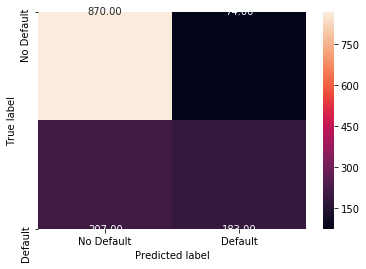

In [96]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [97]:
## Finding Overall Accuracy of the Model
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted ), 2 ) )

cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.79
Precision :  0.81
Recall :  0.92
Sensitivity :  0.92
Specificity :  0.47


### Predicted Probability distribution Plots for Defaults(BAD) and Non Defaults(GOOD)

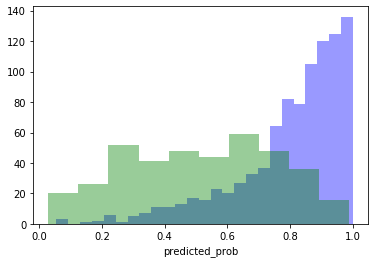

In [98]:
sns.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'b' )
sns.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = 'g' )

In [99]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob  )
round( float( auc_score ), 2 )

0.84

### Plotting ROC Curve 

In [100]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

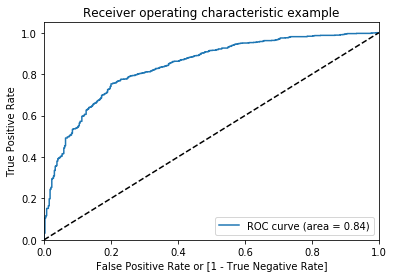

In [101]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob )

### Finding Optimal Cutt-off Probability

In [102]:
thresholds[0:10]

array([1.99996788, 0.99996788, 0.99992222, 0.99918371, 0.99840055,
       0.99827602, 0.99757991, 0.99713821, 0.99679948, 0.99573036])

In [103]:
fpr[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [104]:
tpr[0:10]

array([0.        , 0.00105932, 0.00211864, 0.00317797, 0.00423729,
       0.00529661, 0.00635593, 0.00741525, 0.00847458, 0.0095339 ])

## Find Optimal Cut-off Using YOUDEN's INDEX
#### Youden's J statistic (also called Youden's index) is a single statistic that captures the performance of a dichotomous diagnostic test. Informedness is its generalization to the multiclass case and estimates the probability of an informed decision.
![Youden's Index Formula](files/Capture.PNG "YOUDEN's INDEX")
#### That is when (TPR+TNR -1) is maximum. || max( TPR - (1 - TNR) ) || max( TPR - FPR )

In [105]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:10]

,tpr,fpr,thresholds,diff
789,0.753178,0.200000,0.735590,0.553178
788,0.752119,0.200000,0.735694,0.552119
794,0.756356,0.205128,0.732962,0.551228
787,0.751059,0.200000,0.738491,0.551059
790,0.753178,0.202564,0.735456,0.550614
793,0.755297,0.205128,0.733020,0.550168
786,0.750000,0.200000,0.738824,0.550000
792,0.754237,0.205128,0.734343,0.549109
785,0.748941,0.200000,0.738905,0.548941
795,0.756356,0.207692,0.732685,0.548664


In [106]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.29 else 0)

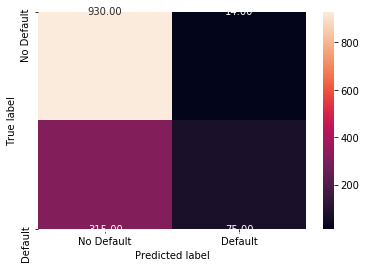

In [107]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_new )

## Finding Optimal Cut-off Probability using Cost


In [108]:
cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_new, [1,0] )

In [109]:
cm_mat = np.array( cm )

In [110]:
cm_mat[1, 0]

315

In [111]:
cm_mat[0, 1]

14

In [112]:
def get_total_cost( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    cm_mat = np.array( cm )
    return cm_mat[0,1] * 2 + cm_mat[0,1] * 1

In [113]:
get_total_cost( y_pred_df.actual, y_pred_df.predicted_new )

42

In [114]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [115]:
idx = 0
for each_prob in range( 20, 50):
    cost = get_total_cost( y_pred_df.actual,
                          y_pred_df.predicted_prob.map(
            lambda x: 1 if x > (each_prob/100)  else 0) )
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

In [116]:
cost_df.sort_values( 'cost', ascending = True )[0:5]

,prob,cost
0,0.20,18.0
1,0.21,21.0
2,0.22,33.0
3,0.23,33.0
4,0.24,36.0


In [117]:
y_pred_df['predicted_final'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.20 else 0)

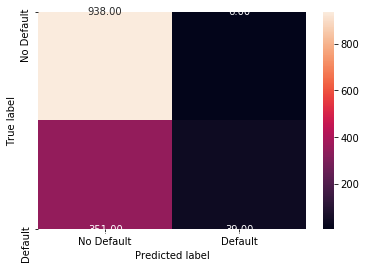

In [118]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_final )

### The Accuracy of the Model got Reduced but the Quadrants that Contribute to the Cost are Minimised

In [119]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted_final ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted_final ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted_final ), 2 ) )

cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_final, [1,0] )

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.73
Precision :  0.73
Recall :  0.99
Sensitivity :  0.99
Specificity :  0.1
